Cluster Assignments (head):
        State  Cluster
0     Alabama        0
1      Alaska        8
2     Arizona        8
3    Arkansas        9
4  California        8

Number of rows in clusters_df: 50
Unique clusters: [ 0  8  9 10  2  3 11  1  6  5  7  4]

Shapefile columns:
Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

Filtered only 'United States of America': (51, 122)
          name iso_3166_2
49      Alaska      US-AK
50     Alabama      US-AL
51    Arkansas      US-AR
52     Arizona      US-AZ
53  California      US-CA

Merged GeoDataFrame shape: (51, 123)
Number of states with missing cluster info: 1

Cluster Value Counts:
Cluster
8.0     15
3.0      8
10.0     6
1.0      5
2.0      3
6.0      3
0.0      2


<Figure size 1200x800 with 0 Axes>

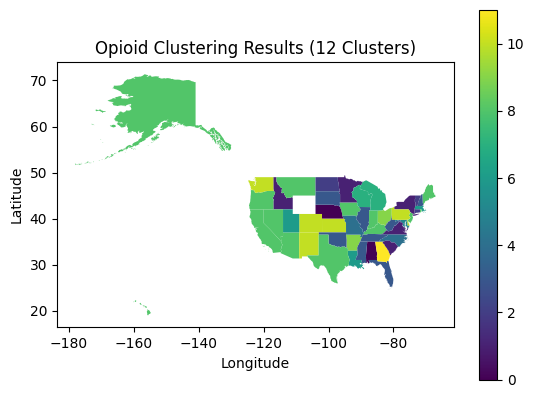


Done! Clustering verification and visualization complete.


In [1]:
##############################################
# 0) ENVIRONMENT & LIBRARIES
##############################################

# Make sure you have installed the following before running:
#    pip install pandas geopandas shapely matplotlib

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

##############################################
# 1) LOAD & VERIFY CLUSTER RESULTS
##############################################

# Replace the CSV filename/path with your own final cluster file
clusters_df = pd.read_csv("C:/Users/nicar/Desktop/Class_Gitlab/project_4_group_7/Final_Clustering_Results__12_Clusters_.csv")

# Inspect the first few rows
print("Cluster Assignments (head):")
print(clusters_df.head())

# Optional: Check how many states are included, unique clusters, etc.
print("\nNumber of rows in clusters_df:", len(clusters_df))
print("Unique clusters:", clusters_df['Cluster'].unique())

##############################################
# 2) LOAD U.S. STATE SHAPEFILE
##############################################

# Adjust the shapefile path if yours is different
# Also confirm that the 'NAME' or 'name' column in the shapefile
# matches up with how states are named in your CSV

states_gdf = gpd.read_file("C:/Users/nicar/Desktop/Project 4/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp")

# Check the columns in your shapefile:
print("\nShapefile columns:")
print(states_gdf.columns)

# Often you'll see columns like 'NAME' for the state name,
# or 'iso_3166_2' for the state code, etc.
# If this shapefile contains all global regions, we might
# filter for the United States:

states_gdf = states_gdf[states_gdf['iso_a2'] == 'US'].copy()

print("\nFiltered only 'United States of America':", states_gdf.shape)
print(states_gdf[['name','iso_3166_2']].head())

##############################################
# 3) PREP YOUR DATA FOR MERGING
##############################################

# Make sure that the name in the shapefile and
# the name in the cluster CSV match in both spelling and case.
# For example, if your CSV uses 'State' = "Alabama", "Alaska", etc.
# and the shapefile uses 'name' = "Alabama", "Alaska", you can just rename columns.

# Let's rename the shapefile column 'name' -> 'State' for easier merging
states_gdf.rename(columns={'name': 'State'}, inplace=True)

# If your CSV also has a column called 'State', you can merge directly
# If the naming differs (e.g. "AL" vs "Alabama"), you'll need a reference table or some additional logic.

##############################################
# 4) MERGE SHAPEFILE & CLUSTERS
##############################################

# Merge: left_on='State' and right_on='State'
merged_gdf = states_gdf.merge(clusters_df, on='State', how='left')

# Check how many rows matched
print("\nMerged GeoDataFrame shape:", merged_gdf.shape)
# Look for missing values in the cluster column (possible state name mismatches)
missing_cluster = merged_gdf['Cluster'].isnull().sum()
print(f"Number of states with missing cluster info: {missing_cluster}")

##############################################
# 5) VERIFY YOUR CLUSTER ASSIGNMENTS
##############################################

# Quick distribution check
print("\nCluster Value Counts:")
print(merged_gdf['Cluster'].value_counts(dropna=False))

##############################################
# 6) PLOT THE CLUSTERS ON A MAP
##############################################

# Note: We use a single distinct plot with matplotlib,
# no explicit colors or custom style.

plt.figure(figsize=(12, 8))
merged_gdf.plot(column='Cluster', legend=True)
plt.title("Opioid Clustering Results (12 Clusters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

##############################################
# 7) OPTIONAL: SAVE PLOT & MERGED FILE
##############################################

# Save the map to a file
# plt.savefig("final_clustering_map.png", dpi=300)

# Save the merged geodataframe to a new shapefile or GeoJSON if needed
# merged_gdf.to_file("final_clustering_results.shp")
# or
# merged_gdf.to_file("final_clustering_results.geojson", driver="GeoJSON")

print("\nDone! Clustering verification and visualization complete.")
